In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['minimum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: minimum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['minimum_nights_avg_ntm'].max()
Min = Mexico['minimum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 70.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

69.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

4.397808970474906

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 70, 16)
intervalos

array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ,
       51.6, 56.2, 60.8, 65.4, 70. ])

In [10]:
# Creamos las categorías

categorias = [
    "Una noche",
    "Estancia muy corta",
    "Estancia corta",
    "Estancia breve",
    "Estancia moderada",
    "Estancia estándar",
    "Estancia cómoda",
    "Estancia prolongada",
    "Estancia más larga",
    "Estancia amplia",
    "Estancia extendida",
    "Estancia larga",
    "Estancia muy larga",
    "Estancia extensiva",
    "Estancia máxima"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['minimum_nights_avg_ntm'] = pd.cut ( x = Mexico ['minimum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Mexico['minimum_nights_avg_ntm']

0              NaN
1              NaN
2        Una noche
3        Una noche
4              NaN
           ...    
26577    Una noche
26578          NaN
26579          NaN
26580          NaN
26581    Una noche
Name: minimum_nights_avg_ntm, Length: 26582, dtype: category
Categories (15, object): ['Una noche' < 'Estancia muy corta' < 'Estancia corta' < 'Estancia breve' ... 'Estancia larga' < 'Estancia muy larga' < 'Estancia extensiva' < 'Estancia máxima']

In [12]:
table1 = freq_tbl(Mexico['minimum_nights_avg_ntm'])
table1

,minimum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Una noche,13994,0.526446,0.884800
1,Estancia muy corta,855,0.032165,0.938859
2,Estancia cómoda,303,0.011399,0.958017
3,Estancia breve,183,0.006884,0.969588
4,Estancia corta,177,0.006659,0.980779
5,Estancia estándar,161,0.006057,0.990959
6,Estancia moderada,73,0.002746,0.995574
7,Estancia muy larga,26,0.000978,0.997218
8,Estancia extensiva,24,0.000903,0.998735
9,Estancia amplia,7,0.000263,0.999178


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,minimum_nights_avg_ntm,frequency
0,Una noche,13994
1,Estancia muy corta,855
2,Estancia cómoda,303
3,Estancia breve,183
4,Estancia corta,177
5,Estancia estándar,161
6,Estancia moderada,73
7,Estancia muy larga,26
8,Estancia extensiva,24
9,Estancia amplia,7


In [14]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 150]
Filtro

,minimum_nights_avg_ntm,frequency
0,Una noche,13994
1,Estancia muy corta,855
2,Estancia cómoda,303
3,Estancia breve,183
4,Estancia corta,177
5,Estancia estándar,161


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('minimum_nights_avg_ntm')
Filtro_index

,frequency
minimum_nights_avg_ntm,
Una noche,13994
Estancia muy corta,855
Estancia cómoda,303
Estancia breve,183
Estancia corta,177
Estancia estándar,161


Text(0, 0.5, 'Frecuencia')

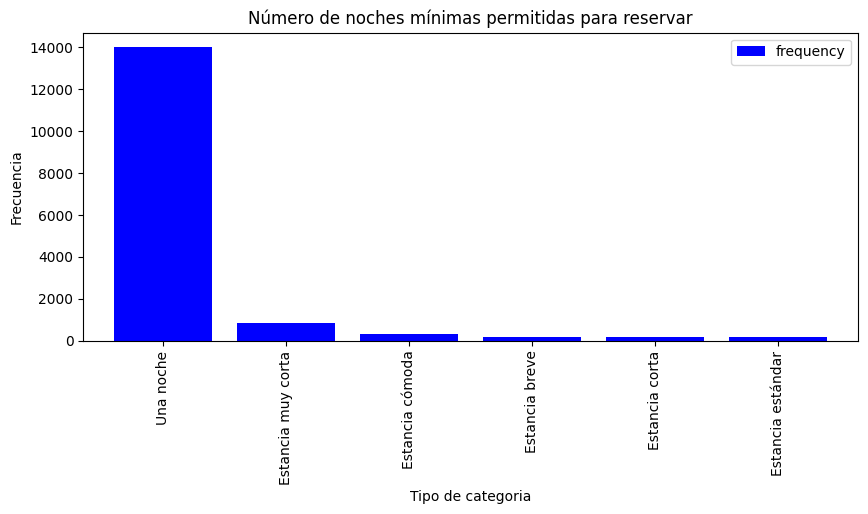

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches mínimas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')